In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt
import pandas as pd

from cluster_measurements import ClusterMeasurements
import iqbal_agn_heating_functions as iq

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# pick values to match figure 1 top left
M500 = 2*10**14*u.Msun/1.25 # Mvir=M500*1.25
R500=1*u.Mpc
z=0

measurements=ClusterMeasurements(R500, M500, z)

Linj=7*10**44 * u.erg/u.s

In [69]:
x_vals=np.logspace(-2, 1)
rs=x_vals*R500

In [5]:
heating_03 = iq.vol_heating_rate(rs, measurements, Linj, 0.3*measurements.R500)
heating_01 = iq.vol_heating_rate(rs, measurements, Linj, 0.1*measurements.R500)

In [6]:
heating_03

<Quantity [2.51452401e-25, 1.81600563e-25, 1.30604282e-25, 9.34953851e-26,
           6.65929212e-26, 4.71725544e-26, 3.32206861e-26, 2.32512803e-26,
           1.61698973e-26, 1.11724024e-26, 7.66982642e-27, 5.23251419e-27,
           3.54863682e-27, 2.39333707e-27, 1.60575764e-27, 1.07189176e-27,
           7.11764687e-28, 4.69861481e-28, 3.08019102e-28, 2.00209632e-28,
           1.28776481e-28, 8.17750040e-29, 5.11310641e-29, 3.13864738e-29,
           1.88525153e-29, 1.10406530e-29, 6.27899882e-30, 3.45266290e-30,
           1.82680047e-30, 9.25102246e-31, 4.45750701e-31, 2.03028309e-31,
           8.67786481e-32, 3.45227338e-32, 1.26655792e-32, 4.24062984e-33,
           1.28041194e-33, 3.43930703e-34, 8.09118003e-35, 1.63746409e-35,
           2.79229654e-36, 3.91750575e-37, 4.39886948e-38, 3.82935144e-39,
           2.49108272e-40, 1.16060240e-41, 3.68736135e-43, 7.54933174e-45,
           9.33058148e-47, 6.45678937e-49] erg / (cm3 s)>

In [7]:
n_e = np.sqrt(0.704)*(iq.rho_g(rs, measurements)/const.m_p).to(u.Mpc**-3)
temp = iq.T_g(rs.value, measurements)
cooling = iq.vol_cooling_rate(n_e, temp)

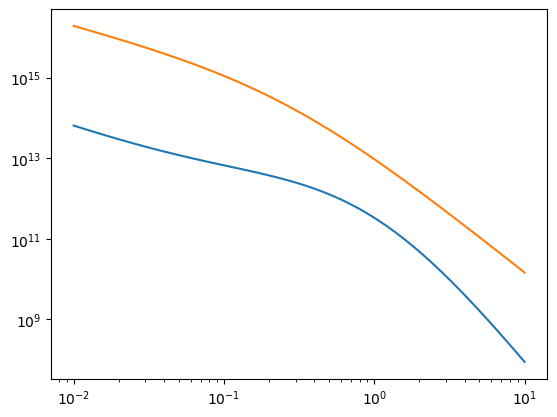

In [8]:
plt.loglog(rs, iq.rho_g(rs, measurements))
plt.loglog(rs, iq.rho_nfw(rs, measurements))
#iq.T_g(rs.value, measurements)

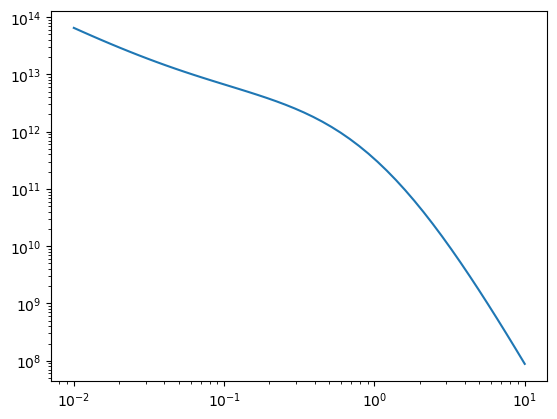

In [9]:
plt.loglog(rs, iq.rho_g(rs, measurements))

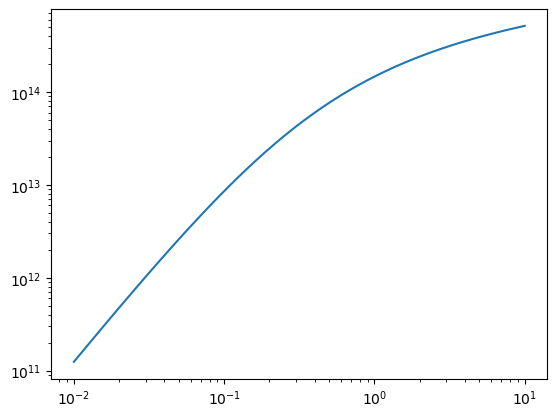

In [10]:
plt.loglog(rs, iq.M_enc(rs, measurements))

In [11]:
iq.virial_radius(M500/1.25, measurements.z)

<Quantity 1.30483787 Mpc>

In [12]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70,0.3)
cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.22224366e+32 solMass / Mpc3>

In [13]:
(3*cosmo.H0**2/(8*np.pi*const.G)).to(u.Msun/u.Mpc**3)
#cosmo.critical_density(z).to(u.Msun/u.Mpc**3)

<Quantity 1.35992947e+11 solMass / Mpc3>

In [14]:
iq.overdensity(z)


101.14287921960845

In [15]:
(n_e**2*iq.cooling_function(temp)).to(u.erg/u.s * u.cm**-3)

<Quantity [6.25558483e-29, 4.55284245e-29, 3.34096100e-29, 2.47114974e-29,
           1.84195625e-29, 1.38343627e-29, 1.04689898e-29, 7.98147636e-30,
           6.12984160e-30, 4.74161991e-30, 3.69312023e-30, 2.89510864e-30,
           2.28285929e-30, 1.80918009e-30, 1.43950404e-30, 1.14840570e-30,
           9.17118566e-31, 7.31754984e-31, 5.82022112e-31, 4.60288847e-31,
           3.60897826e-31, 2.79650499e-31, 2.13412642e-31, 1.59805927e-31,
           1.16964217e-31, 8.33443747e-32, 5.75883446e-32, 3.84363159e-32,
           2.46890080e-32, 1.52114760e-32, 8.96380524e-33, 5.04031956e-33,
           2.69986675e-33, 1.37635224e-33, 6.67619920e-34, 3.08301644e-34,
           1.35710910e-34, 5.70527501e-35, 2.29636420e-35, 8.87550830e-36,
           3.30506698e-36, 1.19004160e-36, 4.15880056e-37, 1.41597241e-37,
           4.71486213e-38, 1.54104072e-38, 4.96159429e-39, 1.57879072e-39,
           4.98012188e-40, 1.56152403e-40] erg / (cm3 s)>

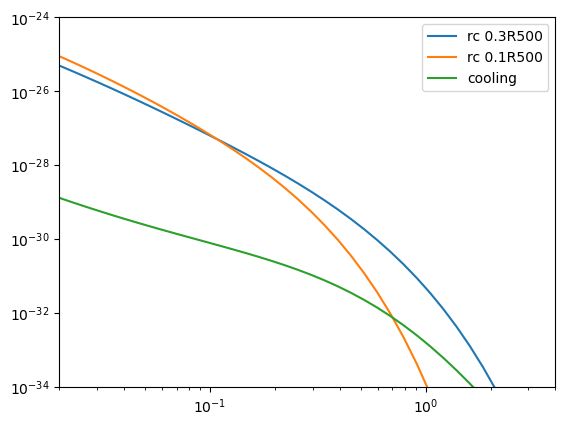

In [16]:
plt.loglog(x_vals, heating_03, label="rc 0.3R500")
plt.loglog(x_vals, heating_01, label="rc 0.1R500")
plt.loglog(x_vals, cooling, label="cooling")
plt.xlim(2*1e-2, 4*1e0)
plt.ylim(1e-34, 1e-24)
plt.legend()

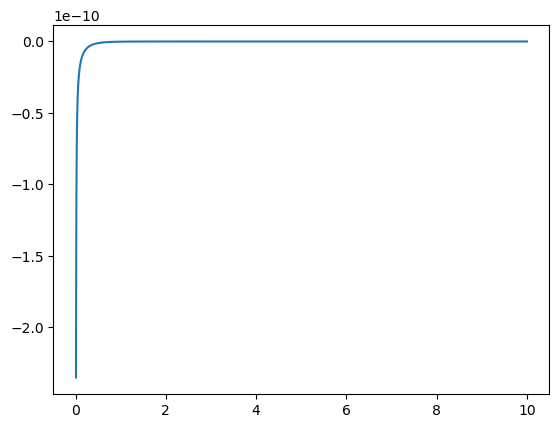

In [17]:
plt.plot(rs, iq.dP_dr(rs, measurements))

In [18]:
q= iq.q(measurements,0.015*measurements.R500,  0.3*measurements.R500)
iq.h(Linj, rs, 0.015*measurements.R500, 0.3*measurements.R500, q)

<Quantity [-1.30934286e+50, -1.08222543e+50, -8.88727602e+49,
           -7.24634548e+49, -5.86245290e+49, -4.70292507e+49,
           -3.73873485e+49, -2.94392079e+49, -2.29511808e+49,
           -1.77120209e+49, -1.35304209e+49, -1.02335615e+49,
           -7.66648753e+48, -5.69202551e+48, -4.19088433e+48,
           -3.06157060e+48, -2.21982468e+48, -1.59743663e+48,
           -1.14048691e+48, -8.07212757e+47, -5.65771355e+47,
           -3.92144593e+47, -2.68338897e+47, -1.80931416e+47,
           -1.19941120e+47, -7.79703330e+46, -4.95578079e+46,
           -3.06927474e+46, -1.84499782e+46, -1.07159267e+46,
           -5.98243020e+45, -3.19108002e+45, -1.61515464e+45,
           -7.69586689e+44, -3.42055403e+44, -1.40332417e+44,
           -5.25021472e+43, -1.76640948e+43, -5.25921503e+42,
           -1.36028182e+42, -2.99200117e+41, -5.46091050e+40,
           -8.04028213e+39, -9.24390983e+38, -7.99383404e+37,
           -4.98017072e+36, -2.12697675e+35, -5.88147519e+33,
        

In [19]:
iq_heating_03 = pd.read_csv('data/iqbal_heating_03.csv', header=None)
iq_heating_01 = pd.read_csv('data/iqbal_heating_01.csv', header=None)
iq_cooling = pd.read_csv('data/iqbal_cooling.csv', header=None)

Text(0.5, 1.0, 'Effervescent heating for M=2e14 Msun, Linj=7e44 erg/s, z=0')

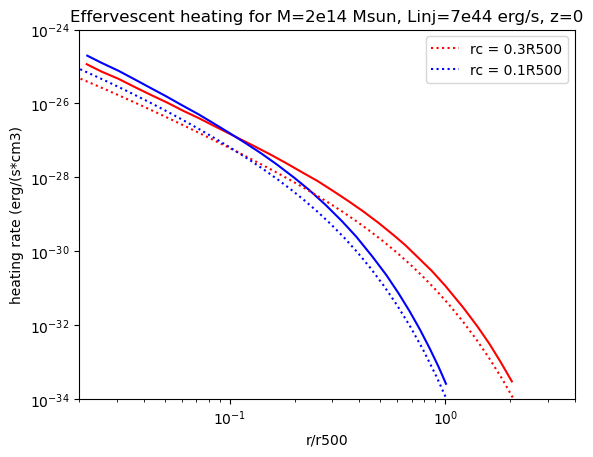

In [149]:
plt.loglog(iq_heating_03[0], iq_heating_03[1], color="red", )
plt.loglog(iq_heating_01[0], iq_heating_01[1], color="blue")
#plt.loglog(iq_cooling[0], iq_cooling[1], color="black")

plt.loglog(x_vals, heating_03, label="rc = 0.3R500", color="red", linestyle='dotted')
plt.loglog(x_vals, heating_01, label="rc = 0.1R500", color="blue", linestyle='dotted')
#plt.loglog(x_vals, cooling, label="cooling", color="black", alpha=0.2)

plt.xlim(2*1e-2, 4*1e0)
plt.ylim(1e-34, 1e-24)
plt.legend()

plt.xlabel("r/r500")
plt.ylabel("heating rate (erg/(s*cm3)")
plt.title("Effervescent heating for M=2e14 Msun, Linj=7e44 erg/s, z=0")

In [21]:
from scipy.integrate import trapezoid as trap
print(trap(iq_heating_03[1], iq_heating_03[0]) )
trap(iq_cooling[1], iq_cooling[0])

1.4227029563617316e-27


5.32180747364336e-29

In [73]:
measurements2 = ClusterMeasurements(2*u.Mpc, 6*1e14 * u.Msun, 0)
iq.P500(measurements2)

<Quantity 3.52478859e-12 erg / cm3>

In [74]:
iq.virial_radius(6*1e14 * u.Msun, 0)

<Quantity 2.18375367 Mpc>

(0.02, 3)

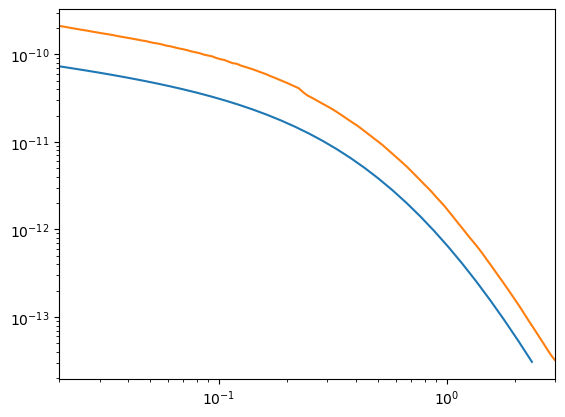

In [79]:
plt.loglog(rs/measurements2.R500, iq.Pg(rs/measurements2.R500, measurements2))
plt.loglog(iq_pressure[0], iq_pressure[1], label="from paper")
plt.xlim(0.02, 3)

In [70]:
iq.Pg(rs/measurements2.R500, measurements2)

<Quantity [1.21453572e-10, 1.15936546e-10, 1.10620151e-10, 1.05492193e-10,
           1.00540701e-10, 9.57539082e-11, 9.11202487e-11, 8.66283605e-11,
           8.22671033e-11, 7.80255921e-11, 7.38932524e-11, 6.98598998e-11,
           6.59158511e-11, 6.20520715e-11, 5.82603633e-11, 5.45336014e-11,
           5.08660181e-11, 4.72535357e-11, 4.36941434e-11, 4.01883027e-11,
           3.67393590e-11, 3.33539225e-11, 3.00421668e-11, 2.68179792e-11,
           2.36988846e-11, 2.07056630e-11, 1.78615873e-11, 1.51912414e-11,
           1.27189300e-11, 1.04667657e-11, 8.45260803e-12, 6.68811026e-12,
           5.17717693e-12, 3.91512655e-12, 2.88876744e-12, 2.07744101e-12,
           1.45489793e-12, 9.91700564e-13, 6.57745759e-13, 4.24506298e-13,
           2.66692584e-13, 1.63198760e-13, 9.73631283e-14, 5.66936744e-14,
           3.22631500e-14, 1.79696342e-14, 9.81066447e-15, 5.25859488e-15,
           2.77166250e-15, 1.43874854e-15] erg / cm3>

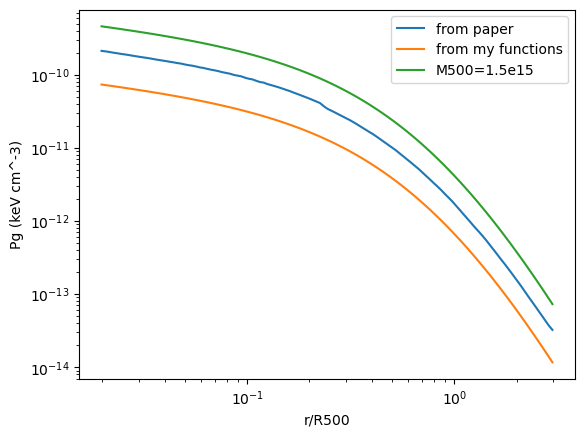

In [76]:
iq_pressure = pd.read_csv('data/iqbal_pressure.csv', header=None)
plt.loglog(iq_pressure[0], iq_pressure[1], label="from paper")
#ClusterMeasurements(1*u.Mpc, 10*1e14*u.Msun, 0)
#ClusterMeasurements(1*u.Mpc, 6*1e14*u.Msun/1.25, 1)
plt.loglog(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2), label="from my functions")
plt.loglog(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), ClusterMeasurements(1*u.Mpc, 15*1e14*u.Msun, 0)), label="M500=1.5e15")
plt.xlabel("r/R500")
plt.ylabel("Pg (keV cm^-3)")
plt.legend()



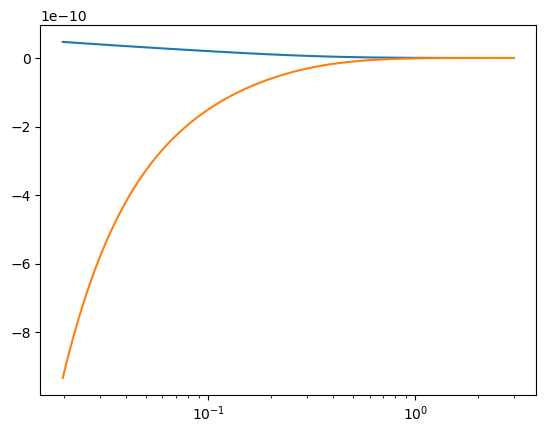

In [26]:
plt.plot(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2), label="from my functions")

plt.plot(iq_pressure[0], iq.dP_dr(iq_pressure[0], measurements2))
plt.xscale("log")

In [27]:
iq.P500(measurements2)

<Quantity 2.2558647e-12 erg / cm3>

In [28]:
measurements2.M500

<Quantity 4.8e+14 solMass>

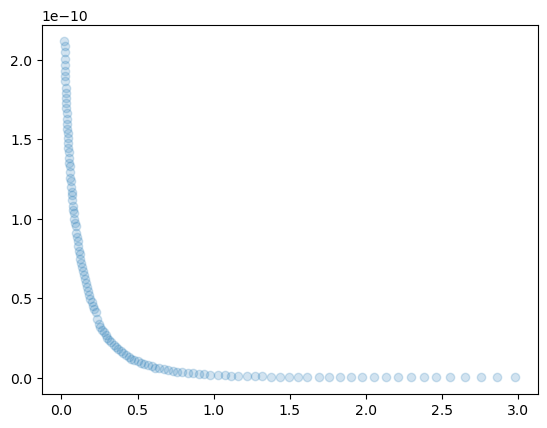

In [29]:
iq_pressure[0]
plt.scatter(iq_pressure[0], iq_pressure[1], alpha=0.2)

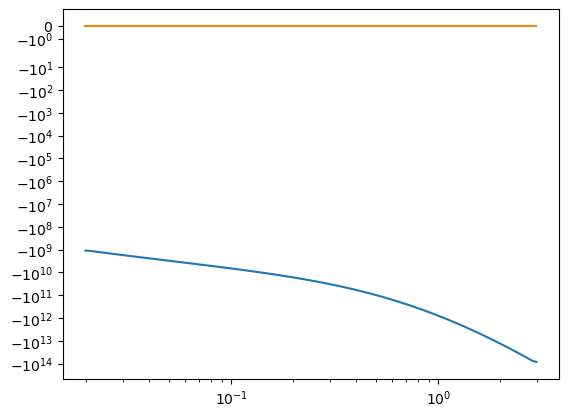

In [30]:
iq_dPdr = np.gradient(iq_pressure[0], iq_pressure[1])
#plt.plot(iq_pressure[0], iq_dPdr)
#plt.plot(iq_pressure[0], iq.dP_dr(list(iq_pressure[0]), measurements2))
plt.plot(iq_pressure[0], np.gradient(iq_pressure[0], iq.Pg(np.array(iq_pressure[0]), measurements2)))

from scipy.optimize import approx_fprime
plt.plot(
    iq_pressure[0],
    [approx_fprime(r,
                   lambda x: iq.Pg(x, measurements2),
                  epsilon=r*1e-8) for r in iq_pressure[0]])

plt.yscale("symlog")
plt.xscale("log")

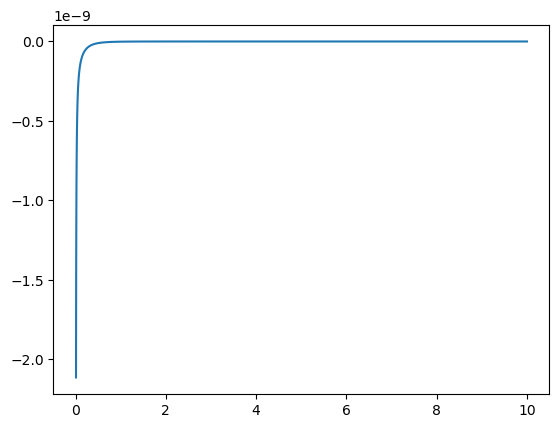

In [31]:
plt.plot(rs, iq.dP_dr(rs, measurements2))

In [32]:
iq.dP_dr(list(iq_pressure[0]), measurements2)

<Quantity [-9.32466656e-10, -8.87906971e-10, -8.45611878e-10,
           -8.05461875e-10, -7.67346504e-10, -7.31153125e-10,
           -6.96781061e-10, -6.64130600e-10, -6.33107045e-10,
           -6.03626756e-10, -5.75605802e-10, -5.48965766e-10,
           -5.23632581e-10, -4.99533615e-10, -4.76603248e-10,
           -4.54780120e-10, -4.34004978e-10, -4.14220498e-10,
           -3.95372690e-10, -3.77412478e-10, -3.60290562e-10,
           -3.43965377e-10, -3.28388357e-10, -3.13523907e-10,
           -2.99335693e-10, -2.85782809e-10, -2.72832340e-10,
           -2.60457159e-10, -2.48621102e-10, -2.37298907e-10,
           -2.26464622e-10, -2.16090646e-10, -2.06153058e-10,
           -1.96632567e-10, -1.87506423e-10, -1.78752417e-10,
           -1.70356752e-10, -1.62300494e-10, -1.54563099e-10,
           -1.47134862e-10, -1.40001610e-10, -1.33145033e-10,
           -1.26556590e-10, -1.20227477e-10, -1.14139747e-10,
           -1.08289307e-10, -1.02664937e-10, -9.72581545e-11,
        

In [33]:
np.gradient(iq_pressure[0], iq.Pg_r(list(iq_pressure[0])*u.Mpc, measurements2))

array([-1.09909800e+09, -1.12672571e+09, -1.18307655e+09, -1.24204457e+09,
       -1.30373361e+09, -1.36826538e+09, -1.43575661e+09, -1.50633683e+09,
       -1.58014505e+09, -1.65731196e+09, -1.73798618e+09, -1.82232201e+09,
       -1.91048111e+09, -2.00264434e+09, -2.09899208e+09, -2.19971133e+09,
       -2.30500596e+09, -2.41509904e+09, -2.53022895e+09, -2.65063791e+09,
       -2.77660532e+09, -2.90839251e+09, -3.04635788e+09, -3.19079608e+09,
       -3.34204732e+09, -3.50055403e+09, -3.66673085e+09, -3.84097016e+09,
       -4.02385094e+09, -4.21586967e+09, -4.41759478e+09, -4.62971363e+09,
       -4.85293560e+09, -5.08795667e+09, -5.33565702e+09, -5.59703003e+09,
       -5.87294902e+09, -6.16456520e+09, -6.47326878e+09, -6.80019666e+09,
       -7.14681298e+09, -7.51500944e+09, -7.90640789e+09, -8.32282158e+09,
       -8.76695180e+09, -9.24084507e+09, -9.74737794e+09, -1.02895772e+10,
       -1.08708769e+10, -1.14949990e+10, -1.21661022e+10, -1.28890437e+10,
       -1.36688645e+10, -

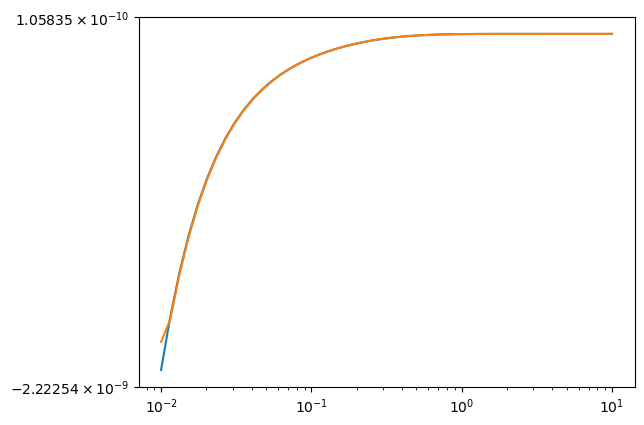

In [34]:
plt.plot(rs, iq.dP_dr(rs, measurements2), label="from approx_fprime")
plt.plot(rs,np.gradient(iq.Pg(rs/measurements2.R500, measurements2), rs), label="from np gradient" )
plt.xscale('log')
plt.yscale('symlog')

In [35]:
np.gradient(iq_pressure[0], iq.Pg(list(iq_pressure[0])*u.Mpc/measurements2.R500, measurements2))

<Quantity [-1.09909800e+09, -1.12672571e+09, -1.18307655e+09,
           -1.24204457e+09, -1.30373361e+09, -1.36826538e+09,
           -1.43575661e+09, -1.50633683e+09, -1.58014505e+09,
           -1.65731196e+09, -1.73798618e+09, -1.82232201e+09,
           -1.91048111e+09, -2.00264434e+09, -2.09899208e+09,
           -2.19971133e+09, -2.30500596e+09, -2.41509904e+09,
           -2.53022895e+09, -2.65063791e+09, -2.77660532e+09,
           -2.90839251e+09, -3.04635788e+09, -3.19079608e+09,
           -3.34204732e+09, -3.50055403e+09, -3.66673085e+09,
           -3.84097016e+09, -4.02385094e+09, -4.21586967e+09,
           -4.41759478e+09, -4.62971363e+09, -4.85293560e+09,
           -5.08795667e+09, -5.33565702e+09, -5.59703003e+09,
           -5.87294902e+09, -6.16456520e+09, -6.47326878e+09,
           -6.80019666e+09, -7.14681298e+09, -7.51500944e+09,
           -7.90640789e+09, -8.32282158e+09, -8.76695180e+09,
           -9.24084507e+09, -9.74737794e+09, -1.02895772e+10,
        

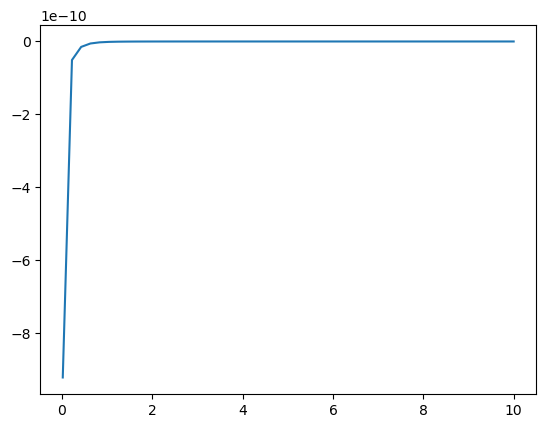

In [36]:
rs_lin = np.linspace(0.02, 10)*u.Mpc
plt.plot(rs_lin, iq.dP_dr(rs_lin, measurements2))

In [37]:
def fprime(r, measurements):
    eps = r*1e-8
    return ((iq.Pg(r+eps, measurements)) - iq.Pg(r, measurements))/eps

In [38]:
[fprime(r,measurements2) for r in iq_pressure[0]]

[<Quantity -9.32466657e-10 erg / cm3>,
 <Quantity -8.87906974e-10 erg / cm3>,
 <Quantity -8.45611878e-10 erg / cm3>,
 <Quantity -8.05461869e-10 erg / cm3>,
 <Quantity -7.67346503e-10 erg / cm3>,
 <Quantity -7.31153121e-10 erg / cm3>,
 <Quantity -6.96781057e-10 erg / cm3>,
 <Quantity -6.64130603e-10 erg / cm3>,
 <Quantity -6.33107044e-10 erg / cm3>,
 <Quantity -6.03626757e-10 erg / cm3>,
 <Quantity -5.75605804e-10 erg / cm3>,
 <Quantity -5.48965768e-10 erg / cm3>,
 <Quantity -5.23632577e-10 erg / cm3>,
 <Quantity -4.99533616e-10 erg / cm3>,
 <Quantity -4.76603246e-10 erg / cm3>,
 <Quantity -4.54780121e-10 erg / cm3>,
 <Quantity -4.34004981e-10 erg / cm3>,
 <Quantity -4.14220501e-10 erg / cm3>,
 <Quantity -3.9537269e-10 erg / cm3>,
 <Quantity -3.7741248e-10 erg / cm3>,
 <Quantity -3.60290564e-10 erg / cm3>,
 <Quantity -3.43965376e-10 erg / cm3>,
 <Quantity -3.28388354e-10 erg / cm3>,
 <Quantity -3.13523907e-10 erg / cm3>,
 <Quantity -2.99335691e-10 erg / cm3>,
 <Quantity -2.85782811e-10 

In [39]:
(iq_pressure[0][0], iq_pressure[0][1])*u.Mpc

<Quantity [0.01979913, 0.02064677] Mpc>

In [40]:
((iq.Pg(iq_pressure[0][1], measurements2) - iq.Pg(iq_pressure[0][0], measurements2))/((iq_pressure[0][1] - iq_pressure[0][0])*u.Mpc))

<Quantity -9.09836979e-10 erg / (cm3 Mpc)>

In [41]:
iq.Pg(iq_pressure[0][1], measurements2)

<Quantity 4.61354684e-11 erg / cm3>

In [42]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70, 0.3)
def M(r, z, r_s):
    delta = 500
    rho_c = (3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)
    return (4*np.pi*rho_c*r_s**3 * (np.log(1+r/r_s) - (r/r_s)/(1+r/r_s))).to(u.Msun)
    
    

In [43]:
(3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)

<Quantity 9.20387392e-30 g / cm3>

In [44]:
from astropy.cosmology import FlatLambdaCDM
cosmo=FlatLambdaCDM(70, 0.3)
cosmo.critical_density(0)

<Quantity 8.27202935e-09 g / cm3>

In [45]:
Rvir = iq.virial_radius(6*10**14*u.Msun, 0)
Rvir

<Quantity 2.18375367 Mpc>

In [46]:
iq.scale_radius(6*10**14*u.Msun, 0)

<Quantity 0.42897675 Mpc>

In [47]:
R500 = 1*u.Mpc
M(R500, z, iq.scale_radius(6*10**14*u.Msun, 0))

<Quantity 6.79258975e+10 solMass>

In [48]:
iq.overdensity(0)

101.14287921960845

In [49]:
iq.c_vir(6*10**14*u.Msun, 0)

<Quantity 5.09061079>

In [50]:
def m500(y, Mvir):
    fac = 4*np.pi*rhoc
    rvir = Rvir(Mvir)
    cvir = Cvir(Mvir)
    rs = c500*rvir
    ## cvir below should be c500!!\n",
    #cterm = cvir**3/(np.log(1+cvir)-cvir/(1+cvir))
    cterm = c500**3/(np.log(1+c500)-c500/(1+c500))
    deltac = 500*cosmo.Om0/3.
    logfac = np.log(1+y) - y/(1+y)
    return fac*logfac*rs**3*deltac*cterm

In [51]:
from astropy.cosmology import WMAP9 as cosmo
rhoc = (3*cosmo.H(z)**2/(8*np.pi*const.G)).to(u.g/u.cm**3)
rhoc

<Quantity 9.02592435e-30 g / cm3>

In [52]:
Deltac = 18*np.pi**2 + 82*(cosmo.Om0-1.)-39.*(cosmo.Om0-1)**2
Deltac

99.29167146960845

In [53]:
def Rvir(Mvir):
    denom = 4*np.pi/3*Deltac*rhoc
    return (Mvir/denom)**(1./3.)
Rvir(6e14*u.Msun).to(u.Mpc)

<Quantity 2.21158754 Mpc>

In [54]:
def Cvir(Mvir):
    mterm = (Mvir/(2e12/0.7*u.Msun))**(-0.081)
    zterm = (1)**(-0.71)
    return 7.85*mterm*zterm
Cvir(6e14*u.Msun)

<Quantity 5.09061079>

In [55]:
ys = np.linspace(0,1,100)

In [56]:
m500(1.0, 6e14*u.Msun)

NameError: name 'c500' is not defined

In [57]:
c500=1.09

In [58]:
m500(1.0, 6e14*u.Msun)

<Quantity 1.30036498e+15 solMass>

In [59]:
Mvir = 6e14*u.Msun
cvir = Cvir(Mvir)
cvir**3/(np.log(1+cvir)-cvir/(1+cvir))



<Quantity 135.86866054>

In [60]:
c500**3/(np.log(1+c500)-c500/(1+c500))

6.0057097346301

In [61]:
R500 = (Rvir(Mvir)*c500/Cvir(Mvir)).to(u.Mpc)

In [62]:
rs = Rvir(Mvir)/Cvir(Mvir)
y = R500/rs
m500(y, Mvir)

<Quantity 1.45175071e+15 solMass>

In [63]:
Mvir = 6

In [80]:
Mvir = 6*1e14*u.Msun
z=0
ClusterMeasurements(iq.virial_radius(Mvir, z), Mvir, z)

ClusterMeasurements(R500=<Quantity 2.18375367 Mpc>, M500=<Quantity 6.e+14 solMass>, z=0, L500=None, T_var=None, fb=0.1)

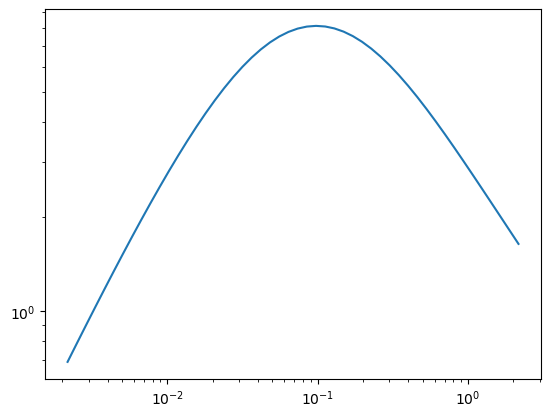

In [87]:
plt.loglog(rs/iq.virial_radius(Mvir, z), iq.T_g(rs.value, ClusterMeasurements(iq.virial_radius(Mvir, z), Mvir, z)).to(u.keV))

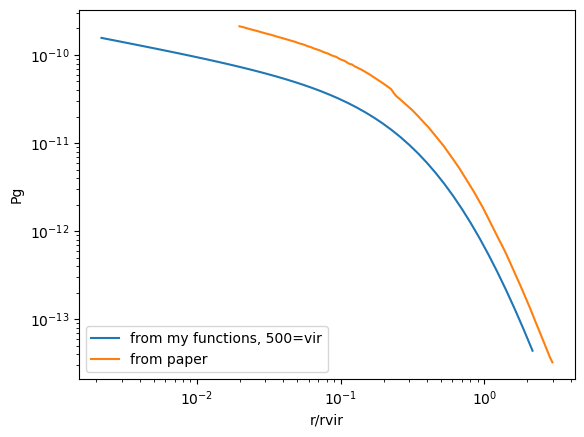

In [102]:
plt.loglog(rs/iq.virial_radius(Mvir, z), iq.Pg_r(rs, ClusterMeasurements(iq.virial_radius(Mvir, z), Mvir, z)), label="from my functions, 500=vir")
plt.loglog(iq_pressure[0], iq_pressure[1], label="from paper")
plt.xlabel("r/rvir")
plt.ylabel("Pg")
plt.legend()

(1e-34, 1e-24)

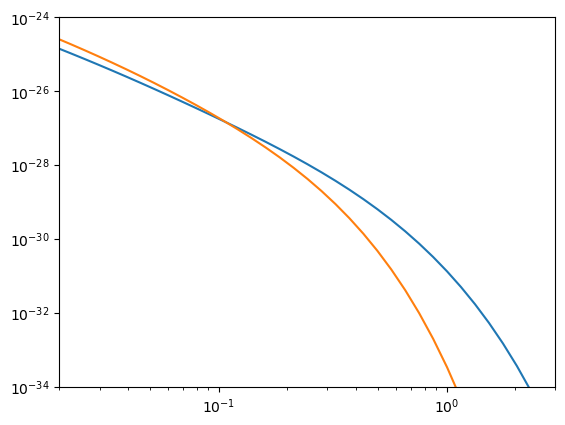

In [122]:
plt.loglog(rs/1*u.Mpc,
           iq.vol_heating_rate(rs, ClusterMeasurements(1*u.Mpc, Mvir, z),
           2*1e45 * u.erg/u.s, 0.3*1*u.Mpc))
plt.loglog(rs/1*u.Mpc,
           iq.vol_heating_rate(rs, ClusterMeasurements(1*u.Mpc, Mvir, z),
           2*1e45 * u.erg/u.s, 0.1*1*u.Mpc))
plt.loglog(rs/1*u.Mpc, iq.vol_cooling_rate)

plt.xlim(2e-2, 3e0)
plt.ylim(1e-34, 1e-24)



In [146]:
iq_heat_2e15_03 = pd.read_csv('data/iqbal_heating_2e15_03.csv', header=None)
iq_heat_2e15_01 = pd.read_csv('data/iqbal_heating_2e15_01.csv', header=None)

Text(0.5, 1.0, 'Effervescent heating for M=2e15 Msun, Linj=5e45 erg/s, z=0')

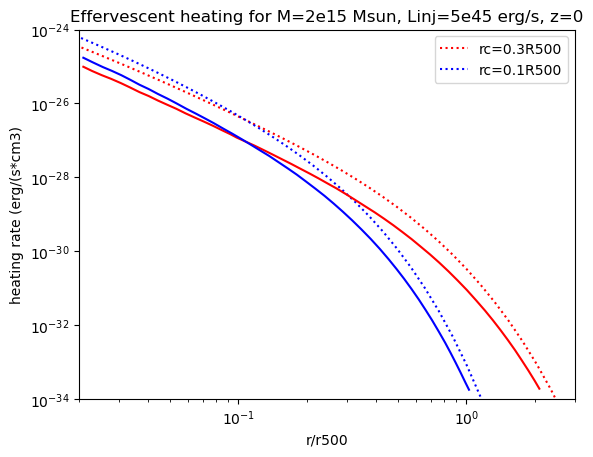

In [150]:
Mvir2 = 2*1e15*u.Msun
Linj = 5*1e45* u.erg/u.s

plt.loglog(rs/1*u.Mpc,
           iq.vol_heating_rate(rs, ClusterMeasurements(1*u.Mpc, Mvir2, z),
            Linj, 0.3*1*u.Mpc), color='red', linestyle='dotted', label="rc=0.3R500")
plt.loglog(rs/1*u.Mpc,
           iq.vol_heating_rate(rs, ClusterMeasurements(1*u.Mpc, Mvir2, z),
           Linj, 0.1*1*u.Mpc,), color='blue', linestyle='dotted', label="rc=0.1R500")
#plt.loglog(rs/1*u.Mpc, iq.vol_cooling_rate)

plt.loglog(iq_heat_2e15_03[0], iq_heat_2e15_03[1], color="red", )
plt.loglog(iq_heat_2e15_01[0], iq_heat_2e15_01[1], color="blue", )

plt.xlim(2e-2, 3e0)
plt.ylim(1e-34, 1e-24)
plt.legend()
plt.xlabel("r/r500")
plt.ylabel("heating rate (erg/(s*cm3)")
plt.title("Effervescent heating for M=2e15 Msun, Linj=5e45 erg/s, z=0")